In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow import  keras
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
from pathlib import Path
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization

In [3]:
def load_and_preprocess(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)
            images.append(img)
            labels.append(label)

    return images, labels


In [4]:
base_path = Path('C:/Users/user/Desktop/Oily-Dry-Skin-Types')
train_dry = os.path.join(base_path, 'train/dry')
train_normal = os.path.join(base_path, 'train/normal')
train_oily = os.path.join(base_path, 'train/oily')

In [5]:

print("Loading and Preprocessing Training Data:")
train_images = []
train_labels = []

dry_images, dry_labels = load_and_preprocess(train_dry, label='dry')
train_images.extend(dry_images)
train_labels.extend(dry_labels)

normal_images, normal_labels = load_and_preprocess(train_normal, label='normal')
train_images.extend(normal_images)
train_labels.extend(normal_labels)

oily_images, oily_labels = load_and_preprocess(train_oily, label='oily')
train_images.extend(oily_images)
train_labels.extend(oily_labels)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

label_encoder = LabelEncoder()
train_labels_numeric = label_encoder.fit_transform(train_labels)

train_labels_one_hot = to_categorical(train_labels_numeric)

train_images_normalized = train_images / 255.0


Loading and Preprocessing Training Data:


<Axes: xlabel='Labels', ylabel='count'>

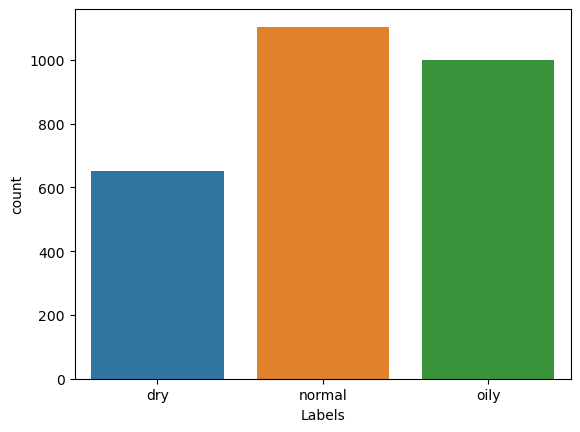

In [8]:
df = pd.DataFrame({'Labels': train_labels})
sns.countplot(data=df, x='Labels')

In [9]:

x_train, x_test, y_train, y_test = train_test_split(
    train_images_normalized, train_labels_one_hot, test_size=0.2, random_state=42
)



In [10]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2204, 128, 128)
X_test shape: (552, 128, 128)
y_train shape: (2204, 3)
y_test shape: (552, 3)


In [11]:
# def create_model(hidden_units):
    
#     model = models.Sequential()

#     model.add(Conv2D(hidden_units, (3, 3), activation='relu', padding='same', input_shape=(128,128,1))) 

#     model.add(Conv2D(hidden_units, (3, 3), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2, 2))) 
#     model.add(Dropout(0.25))

#     model.add(layers.Conv2D(hidden_units, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(hidden_units, (3, 3), activation='relu', padding='same')) 
#     model.add(MaxPooling2D(pool_size=(2, 2))) 
#     model.add(Dropout(0.25)) 
    
#     model.add(layers.Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(layers.Dense(3, activation='softmax')) 
#     model.compile(optimizer='adam',
#             loss='categorical_crossentropy',
#             metrics=['accuracy'])
#     return model
# model=KerasClassifier(model=create_model,loss='categorical_crossentropy',epochs=5,batch_size=32,verbose=1)
# param={
#     'model__hidden_units':[32,64,128],
# }
# grid=GridSearchCV(estimator=model,param_grid=param,verbose=1,cv=3,error_score='raise')
# grid.fit(x_train,y_train)

In [12]:
# grid.best_params_
# {'model__hidden_units': 64}

In [13]:
model = models.Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128,128,1))) 
# model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', ))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
model.add(layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) 
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

In [14]:
early_stopping_cb = tf.keras.callbacks.ModelCheckpoint("model_{epoch:02d}_{val_accuracy:.2f}.h5", save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
hist = model.fit(x_train, y_train,  
           batch_size=32, epochs=20,  
           validation_split=0.2,callbacks=[early_stopping_cb]) 

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 1.1351 - accuracy: 0.4056
Epoch 1: val_loss improved from inf to 1.06568, saving model to model_01_0.37.h5
56/56 [==============================] - 136s 2s/step - loss: 1.1351 - accuracy: 0.4056 - val_loss: 1.0657 - val_accuracy: 0.3696
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 1.0787 - accuracy: 0.3988
Epoch 2: val_loss improved from 1.06568 to 1.05973, saving model to model_02_0.42.h5
56/56 [==============================] - 118s 2s/step - loss: 1.0787 - accuracy: 0.3988 - val_loss: 1.0597 - val_accuracy: 0.4218
Epoch 3/20
56/56 [==============================] - ETA: 0s - loss: 1.0783 - accuracy: 0.4209
Epoch 3: val_loss did not improve from 1.05973
56/56 [==============================] - 126s 2s/step - loss: 1.0783 - accuracy: 0.4209 - val_loss: 1.0727 - val_accuracy: 0.3832
Epoch 4/20
56/56 [==============================] - ETA: 0s - loss: 1.0746 - accuracy: 0.3936
Epoch 4: val_loss did

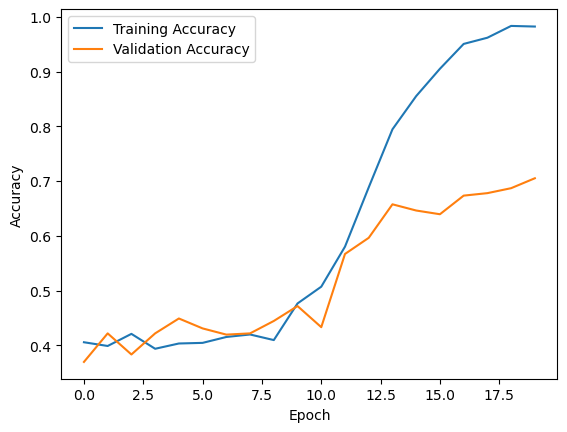

In [15]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

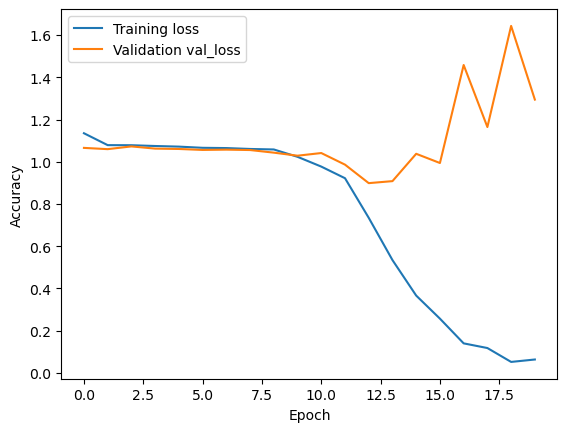

In [25]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 467ms/step


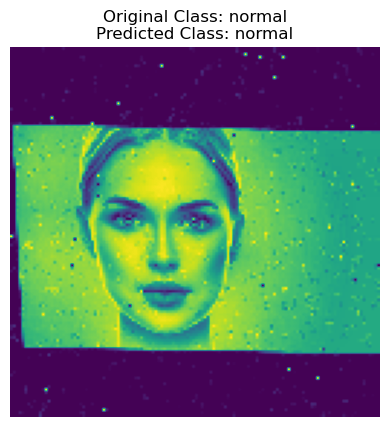

1/1 [==============================] - 0s 61ms/step


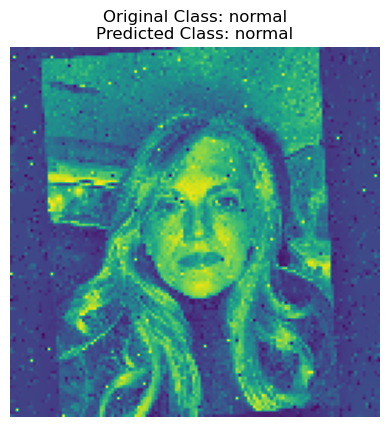

1/1 [==============================] - 0s 50ms/step


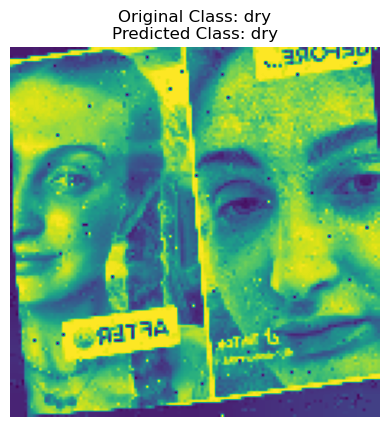

1/1 [==============================] - 0s 49ms/step


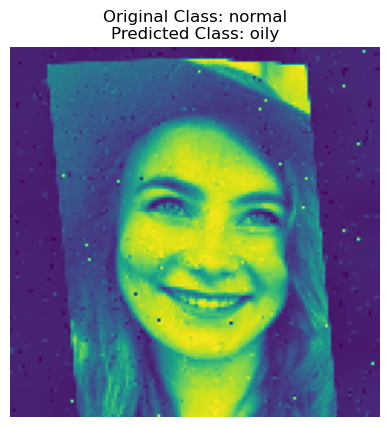

1/1 [==============================] - 0s 73ms/step


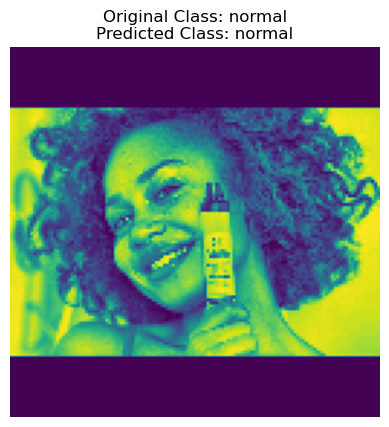

1/1 [==============================] - 0s 50ms/step


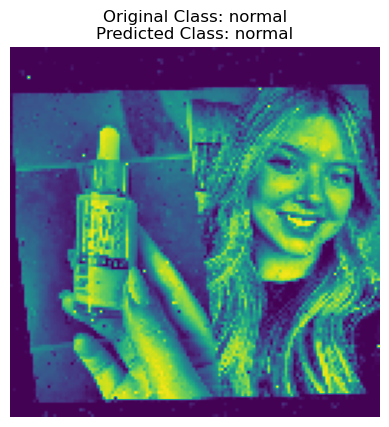

In [129]:
for sample_index in np.random.randint(0,len(x_test),size=6):
    sample_image = x_test[sample_index].reshape((1, 128, 128, 1))
    original_label = np.argmax(y_test[sample_index])
    original_label_label = label_encoder.classes_[original_label]

    predicted_probabilities = model.predict(sample_image)
    predicted_class = np.argmax(predicted_probabilities)
    predicted_class_label = label_encoder.classes_[predicted_class]

    sample_image_reshaped = sample_image.reshape((128, 128))
    plt.imshow(sample_image_reshaped, cmap=None)
    plt.title(f"Original Class: {original_label_label}\nPredicted Class: {predicted_class_label}")
    plt.axis('off')
    plt.show()